## Module Requirements 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import os
import os.path 

import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix   
from sklearn.metrics import classification_report

from sklearn.metrics import brier_score_loss 
from sklearn.metrics import auc 

import warnings
warnings.filterwarnings('ignore')

In [3]:
import sys
sys.path.append('../')
from src import utils, applyThreshold, calcMetrics, cnn_evaluate

## Metircs 

<img src="SkillMetrics.png" width="800" height="400">

## Trained Models Direction

In [4]:
trained_model_root_dir  = '../trained_model/'

In [45]:
train = pd.read_csv(trained_model_root_dir + 'VIS_True_TRAIN.csv')
train['CAT1600'] = np.where(train['VIS'] <= 1, 0, 1)
train['CAT3200'] = np.where(train['VIS'] < 4, 0, 1)
train['CAT6400'] = np.where(train['VIS'] < 7, 0, 1)
train.to_csv(trained_model_root_dir + 'VIS_True_TRAIN.csv')

In [46]:
test = pd.read_csv(trained_model_root_dir + 'VIS_True_TEST.csv')
test['CAT1600'] = np.where(test['VIS'] <= 1, 0, 1)
test['CAT3200'] = np.where(test['VIS'] < 4, 0, 1)
test['CAT6400'] = np.where(test['VIS'] < 7, 0, 1)
test.to_csv(trained_model_root_dir + 'VIS_True_TEST.csv')

## 24 Hr lead Time Prediction Evaluation 

### Category less than 1600m

In [6]:
trained_model_dir_241600 = os.path.join(trained_model_root_dir, "24hr/1600/")
tr_24_1600_ypred = pd.read_csv(trained_model_dir_241600 + 'VIS_Prob_TRAIN.csv')
tr_24_1600_ypred = tr_24_1600_ypred.to_numpy() 

tr_24_1600_ytrue = pd.read_csv(trained_model_root_dir + 'VIS_True_TRAIN.csv')
tr_24_1600_ytrue = tr_24_1600_ytrue['CAT1600']
tr_24_1600_ytrue = tr_24_1600_ytrue.to_numpy().ravel()

te_24_1600_ypred = pd.read_csv(trained_model_dir_241600 + 'VIS_Prob_TEST.csv')
te_24_1600_ypred = te_24_1600_ypred.to_numpy()

te_24_1600_ytrue = pd.read_csv(trained_model_root_dir + 'VIS_True_TEST.csv')
te_24_1600_ytrue = te_24_1600_ytrue['CAT1600']
te_24_1600_ytrue = te_24_1600_ytrue.to_numpy().ravel()

In [42]:
# calculating the optimal threshold based on training data plus all the metrics: 
optimal_threshold_24_1600, TrAcc241600, Res241600  = cnn_evaluate.skilled_metrics(tr_24_1600_ytrue, tr_24_1600_ypred, metric = 'HSS') 
# calculating the metrics for test dataset based on optimal threshold 
TeAcc241600 = cnn_evaluate.test_eval(te_24_1600_ytrue, te_24_1600_ypred, threshold = optimal_threshold_24_1600)
_ = cnn_evaluate.print_results(TrAcc241600, TeAcc241600)

=============   24 hr prediction for <6400m category   ===============
Hit/Miss cases: 
       Hit    Miss    False Alarm   Correct rejected
Train  97      6         10              5347
Test   37      30        35              2126

Metrics:
       POD     F    FAR    CSI    PSS     HSS   ORSS   CSS   SEDI
Train  0.94   0.94  0.09   0.86   0.94   0.92   1.00   0.91  0.99
Test   0.55   0.02  0.49   0.36   0.54   0.52   0.97   0.50  0.78


<Figure size 720x720 with 0 Axes>

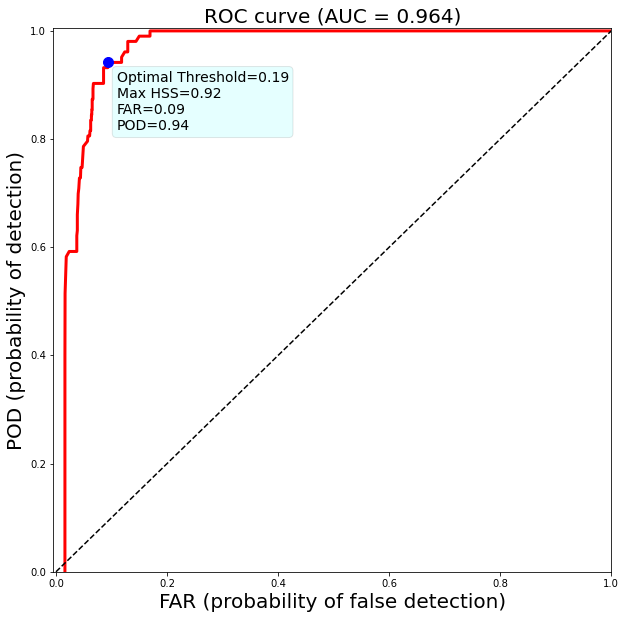

In [16]:
_ = cnn_evaluate.ROC_Curve_Plot(optimal_threshold_24_1600, TrAcc241600, Res241600)

### Category less than 3200m

In [47]:
trained_model_dir_243200 = os.path.join(trained_model_root_dir, "24hr/3200/")
tr_24_3200_ypred = pd.read_csv(trained_model_dir_243200 + 'VIS_Prob_TRAIN.csv')
tr_24_3200_ypred = tr_24_3200_ypred.to_numpy() 

tr_24_3200_ytrue = pd.read_csv(trained_model_root_dir + 'VIS_True_TRAIN.csv')
tr_24_3200_ytrue = tr_24_3200_ytrue['CAT3200']
tr_24_3200_ytrue = tr_24_3200_ytrue.to_numpy().ravel()

te_24_3200_ypred = pd.read_csv(trained_model_dir_243200 + 'VIS_Prob_TEST.csv')
te_24_3200_ypred = te_24_3200_ypred.to_numpy()

te_24_3200_ytrue = pd.read_csv(trained_model_root_dir + 'VIS_True_TEST.csv')
te_24_3200_ytrue = te_24_3200_ytrue['CAT3200']
te_24_3200_ytrue = te_24_3200_ytrue.to_numpy().ravel()

In [48]:
# calculating the optimal threshold based on training data plus all the metrics: 
optimal_threshold_24_3200, TrAcc243200, Res243200  = cnn_evaluate.skilled_metrics(tr_24_3200_ytrue, tr_24_3200_ypred, metric = 'HSS') 
# calculating the metrics for test dataset based on optimal threshold 
TeAcc243200 = cnn_evaluate.test_eval(te_24_3200_ytrue, te_24_3200_ypred, threshold = optimal_threshold_24_3200)
_ = cnn_evaluate.print_results(TrAcc243200, TeAcc243200)

=============   24 hr prediction for <6400m category   ===============
Hit/Miss cases: 
       Hit    Miss    False Alarm   Correct rejected
Train  148      66         23              5223
Test   71      67        59              2031

Metrics:
       POD     F    FAR    CSI    PSS     HSS   ORSS   CSS   SEDI
Train  0.69   0.69  0.13   0.62   0.69   0.76   1.00   0.85  0.89
Test   0.51   0.03  0.45   0.36   0.49   0.50   0.95   0.51  0.72


<Figure size 720x720 with 0 Axes>

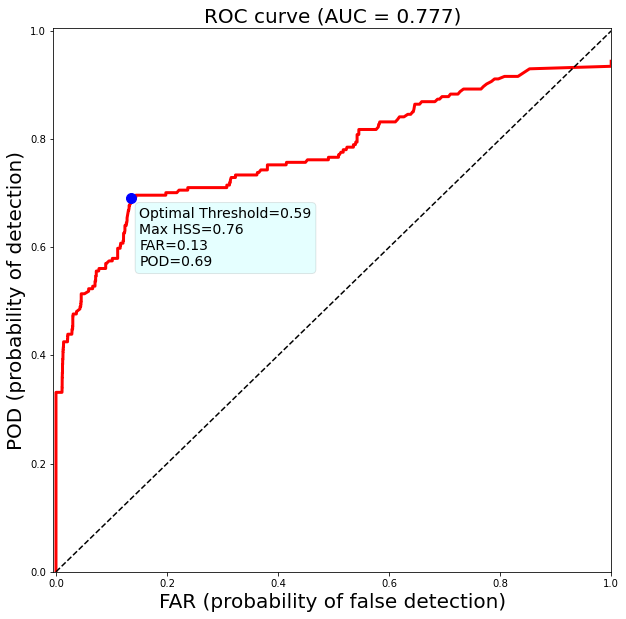

In [49]:
_ = cnn_evaluate.ROC_Curve_Plot(optimal_threshold_24_3200, TrAcc243200, Res243200)

### Category less than 6400m

In [50]:
trained_model_dir_246400 = os.path.join(trained_model_root_dir, "24hr/6400/")
tr_24_6400_ypred = pd.read_csv(trained_model_dir_246400 + 'VIS_Prob_TRAIN.csv')
tr_24_6400_ypred = tr_24_6400_ypred.to_numpy() 

tr_24_6400_ytrue = pd.read_csv(trained_model_root_dir + 'VIS_True_TRAIN.csv')
tr_24_6400_ytrue = tr_24_6400_ytrue['CAT6400']
tr_24_6400_ytrue = tr_24_6400_ytrue.to_numpy().ravel()

te_24_6400_ypred = pd.read_csv(trained_model_dir_246400 + 'VIS_Prob_TEST.csv')
te_24_6400_ypred = te_24_6400_ypred.to_numpy()

te_24_6400_ytrue = pd.read_csv(trained_model_root_dir + 'VIS_True_TEST.csv')
te_24_6400_ytrue = te_24_6400_ytrue['CAT6400']
te_24_6400_ytrue = te_24_6400_ytrue.to_numpy().ravel()

In [51]:
# calculating the optimal threshold based on training data plus all the metrics: 
optimal_threshold_24_6400, TrAcc246400, Res246400  = cnn_evaluate.skilled_metrics(tr_24_6400_ytrue, tr_24_6400_ypred, metric = 'HSS') 
# calculating the metrics for test dataset based on optimal threshold 
TeAcc246400 = cnn_evaluate.test_eval(te_24_6400_ytrue, te_24_6400_ypred, threshold = optimal_threshold_24_6400)
_ = cnn_evaluate.print_results(TrAcc246400, TeAcc246400)

=============   24 hr prediction for <6400m category   ===============
Hit/Miss cases: 
       Hit    Miss    False Alarm   Correct rejected
Train  369      177         105              4809
Test   164      70        118              1876

Metrics:
       POD     F    FAR    CSI    PSS     HSS   ORSS   CSS   SEDI
Train  0.68   0.68  0.22   0.57   0.65   0.70   0.98   0.74  0.85
Test   0.70   0.06  0.42   0.47   0.64   0.59   0.95   0.55  0.81


<Figure size 720x720 with 0 Axes>

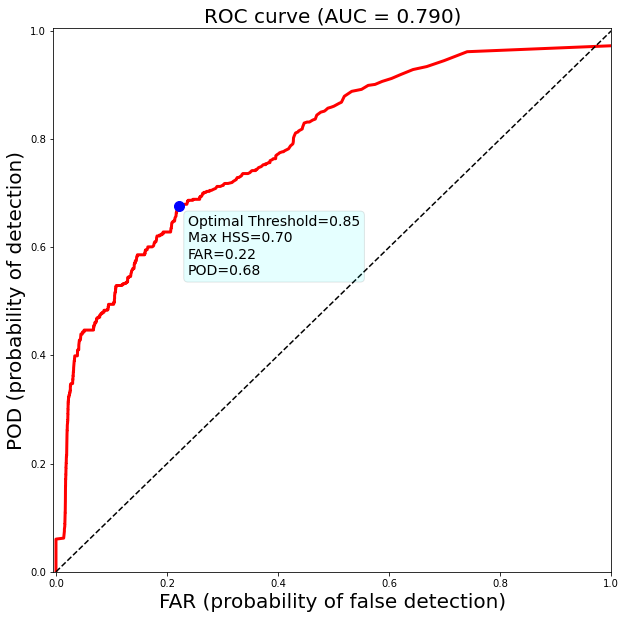

In [52]:
_ = cnn_evaluate.ROC_Curve_Plot(optimal_threshold_24_6400, TrAcc246400, Res246400)

***

## 12 Hr lead Time Prediction Evaluation

### Category less than 1600m

In [53]:
trained_model_dir_121600 = os.path.join(trained_model_root_dir, "12hr/1600/")
tr_12_1600_ypred = pd.read_csv(trained_model_dir_121600 + 'VIS_Prob_TRAIN.csv')
tr_12_1600_ypred = tr_12_1600_ypred.to_numpy() 

tr_12_1600_ytrue = pd.read_csv(trained_model_root_dir + 'VIS_True_TRAIN.csv')
tr_12_1600_ytrue = tr_12_1600_ytrue['CAT1600']
tr_12_1600_ytrue = tr_12_1600_ytrue.to_numpy().ravel()

te_12_1600_ypred = pd.read_csv(trained_model_dir_121600 + 'VIS_Prob_TEST.csv')
te_12_1600_ypred = te_12_1600_ypred.to_numpy()

te_12_1600_ytrue = pd.read_csv(trained_model_root_dir + 'VIS_True_TEST.csv')
te_12_1600_ytrue = te_12_1600_ytrue['CAT1600']
te_12_1600_ytrue = te_12_1600_ytrue.to_numpy().ravel()

In [54]:
# calculating the optimal threshold based on training data plus all the metrics: 
optimal_threshold_12_1600, TrAcc121600, Res121600  = cnn_evaluate.skilled_metrics(tr_12_1600_ytrue, tr_12_1600_ypred, metric = 'HSS') 
# calculating the metrics for test dataset based on optimal threshold 
TeAcc121600 = cnn_evaluate.test_eval(te_12_1600_ytrue, te_12_1600_ypred, threshold = optimal_threshold_12_1600)
_ = cnn_evaluate.print_results(TrAcc121600, TeAcc121600)

Hit/Miss cases: 
       Hit    Miss    False Alarm   Correct rejected
Train  86      17         14              5343
Test   40      27        52              2109

Metrics:
       POD     F    FAR    CSI    PSS     HSS   ORSS   CSS   SEDI
Train  0.83   0.83  0.14   0.74   0.83   0.84   1.00   0.86  0.95
Test   0.60   0.02  0.57   0.34   0.57   0.49   0.97   0.42  0.79


<Figure size 720x720 with 0 Axes>

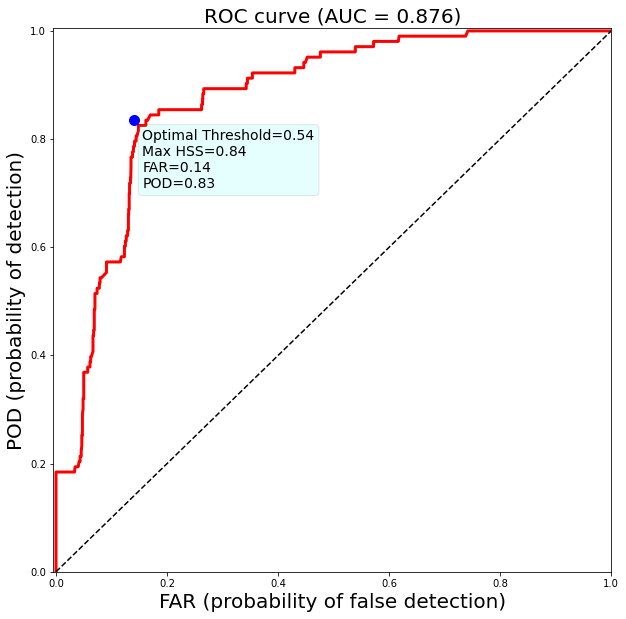

In [55]:
_ = cnn_evaluate.ROC_Curve_Plot(optimal_threshold_12_1600, TrAcc121600, Res121600)

### Category less than 3200m

In [56]:
trained_model_dir_123200 = os.path.join(trained_model_root_dir, "12hr/3200/")
tr_12_3200_ypred = pd.read_csv(trained_model_dir_123200 + 'VIS_Prob_TRAIN.csv')
tr_12_3200_ypred = tr_12_3200_ypred.to_numpy() 

tr_12_3200_ytrue = pd.read_csv(trained_model_root_dir + 'VIS_True_TRAIN.csv')
tr_12_3200_ytrue = tr_12_3200_ytrue['CAT3200']
tr_12_3200_ytrue = tr_12_3200_ytrue.to_numpy().ravel()

te_12_3200_ypred = pd.read_csv(trained_model_dir_123200 + 'VIS_Prob_TEST.csv')
te_12_3200_ypred = te_12_3200_ypred.to_numpy()

te_12_3200_ytrue = pd.read_csv(trained_model_root_dir + 'VIS_True_TEST.csv')
te_12_3200_ytrue = te_12_3200_ytrue['CAT3200']
te_12_3200_ytrue = te_12_3200_ytrue.to_numpy().ravel()

In [57]:
# calculating the optimal threshold based on training data plus all the metrics: 
optimal_threshold_12_3200, TrAcc123200, Res123200  = cnn_evaluate.skilled_metrics(tr_12_3200_ytrue, tr_12_3200_ypred, metric = 'HSS') 
# calculating the metrics for test dataset based on optimal threshold 
TeAcc123200 = cnn_evaluate.test_eval(te_12_3200_ytrue, te_12_3200_ypred, threshold = optimal_threshold_12_3200)
_ = cnn_evaluate.print_results(TrAcc123200, TeAcc123200)

Hit/Miss cases: 
       Hit    Miss    False Alarm   Correct rejected
Train  126      88         41              5205
Test   72      66        49              2041

Metrics:
       POD     F    FAR    CSI    PSS     HSS   ORSS   CSS   SEDI
Train  0.59   0.59  0.25   0.49   0.58   0.65   0.99   0.74  0.83
Test   0.52   0.02  0.40   0.39   0.50   0.53   0.96   0.56  0.74


<Figure size 720x720 with 0 Axes>

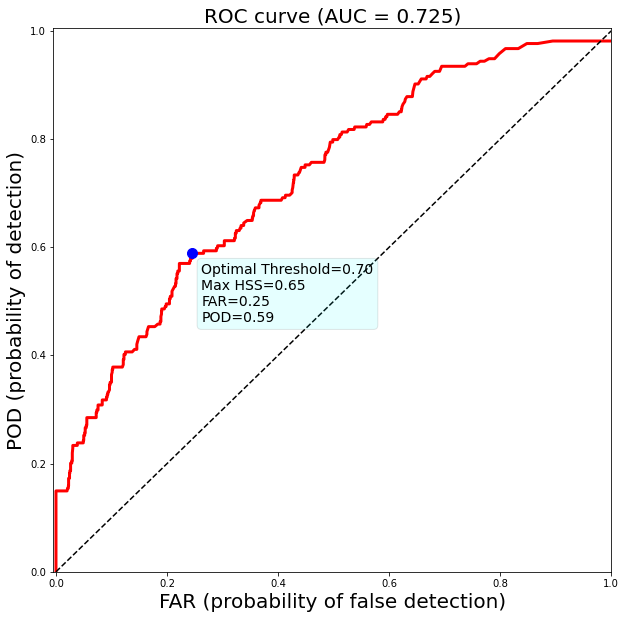

In [58]:
_ = cnn_evaluate.ROC_Curve_Plot(optimal_threshold_12_3200, TrAcc123200, Res123200)

### Category less than 6400m

In [59]:
trained_model_dir_126400 = os.path.join(trained_model_root_dir, "12hr/6400/")
tr_12_6400_ypred = pd.read_csv(trained_model_dir_126400 + 'VIS_Prob_TRAIN.csv')
tr_12_6400_ypred = tr_12_6400_ypred.to_numpy() 

tr_12_6400_ytrue = pd.read_csv(trained_model_root_dir + 'VIS_True_TRAIN.csv')
tr_12_6400_ytrue = tr_12_6400_ytrue['CAT6400']
tr_12_6400_ytrue = tr_12_6400_ytrue.to_numpy().ravel()

te_12_6400_ypred = pd.read_csv(trained_model_dir_126400 + 'VIS_Prob_TEST.csv')
te_12_6400_ypred = te_12_6400_ypred.to_numpy()

te_12_6400_ytrue = pd.read_csv(trained_model_root_dir + 'VIS_True_TEST.csv')
te_12_6400_ytrue = te_12_6400_ytrue['CAT6400']
te_12_6400_ytrue = te_12_6400_ytrue.to_numpy().ravel()

In [60]:
# calculating the optimal threshold based on training data plus all the metrics: 
optimal_threshold_12_6400, TrAcc126400, Res126400  = cnn_evaluate.skilled_metrics(tr_12_6400_ytrue, tr_12_6400_ypred, metric = 'HSS') 
# calculating the metrics for test dataset based on optimal threshold 
TeAcc126400 = cnn_evaluate.test_eval(te_12_6400_ytrue, te_12_6400_ypred, threshold = optimal_threshold_12_6400)
_ = cnn_evaluate.print_results(TrAcc126400, TeAcc126400)

Hit/Miss cases: 
       Hit    Miss    False Alarm   Correct rejected
Train  338      208         92              4822
Test   170      64        107              1887

Metrics:
       POD     F    FAR    CSI    PSS     HSS   ORSS   CSS   SEDI
Train  0.62   0.62  0.21   0.53   0.60   0.66   0.98   0.74  0.82
Test   0.73   0.05  0.39   0.50   0.67   0.62   0.96   0.58  0.84


<Figure size 720x720 with 0 Axes>

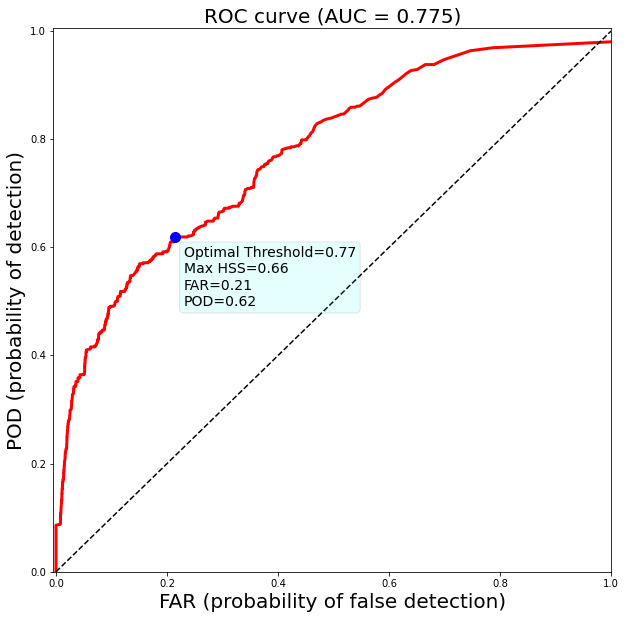

In [61]:
_ = cnn_evaluate.ROC_Curve_Plot(optimal_threshold_12_6400, TrAcc126400, Res126400)

***

## 6 Hr lead Time Prediction Evaluation

### Category less than 1600m

In [62]:
trained_model_dir_61600 = os.path.join(trained_model_root_dir, "6hr/1600/")
tr_6_1600_ypred = pd.read_csv(trained_model_dir_61600 + 'VIS_Prob_TRAIN.csv')
tr_6_1600_ypred = tr_6_1600_ypred.to_numpy() 

tr_6_1600_ytrue = pd.read_csv(trained_model_root_dir + 'VIS_True_TRAIN.csv')
tr_6_1600_ytrue = tr_6_1600_ytrue['CAT1600']
tr_6_1600_ytrue = tr_6_1600_ytrue.to_numpy().ravel()

te_6_1600_ypred = pd.read_csv(trained_model_dir_61600 + 'VIS_Prob_TEST.csv')
te_6_1600_ypred = te_6_1600_ypred.to_numpy()

te_6_1600_ytrue = pd.read_csv(trained_model_root_dir + 'VIS_True_TEST.csv')
te_6_1600_ytrue = te_6_1600_ytrue['CAT1600']
te_6_1600_ytrue = te_6_1600_ytrue.to_numpy().ravel()

In [63]:
# calculating the optimal threshold based on training data plus all the metrics: 
optimal_threshold_6_1600, TrAcc61600, Res61600  = cnn_evaluate.skilled_metrics(tr_6_1600_ytrue, tr_6_1600_ypred, metric = 'HSS') 
# calculating the metrics for test dataset based on optimal threshold 
TeAcc61600 = cnn_evaluate.test_eval(te_6_1600_ytrue, te_6_1600_ypred, threshold = optimal_threshold_6_1600)
_ = cnn_evaluate.print_results(TrAcc61600, TeAcc61600)

Hit/Miss cases: 
       Hit    Miss    False Alarm   Correct rejected
Train  94      9         27              5330
Test   45      22        45              2116

Metrics:
       POD     F    FAR    CSI    PSS     HSS   ORSS   CSS   SEDI
Train  0.91   0.91  0.22   0.72   0.91   0.84   1.00   0.78  0.98
Test   0.67   0.02  0.50   0.40   0.65   0.56   0.98   0.49  0.84


<Figure size 720x720 with 0 Axes>

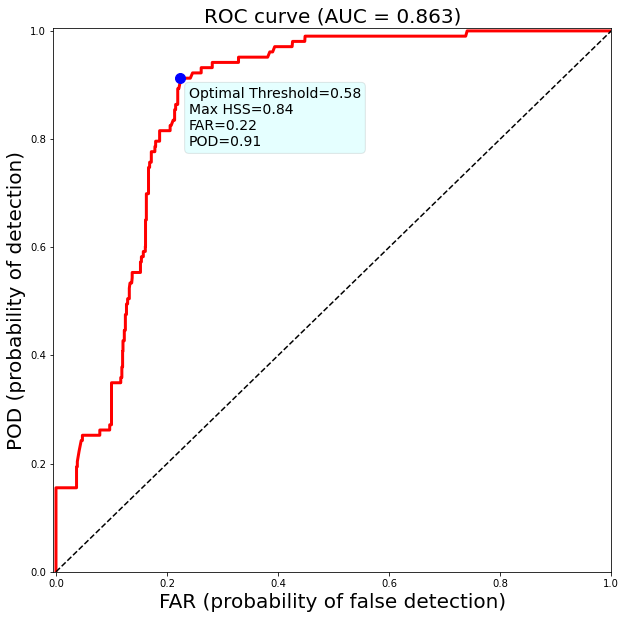

In [64]:
_ = cnn_evaluate.ROC_Curve_Plot(optimal_threshold_6_1600, TrAcc61600, Res61600)

### Category less than 3200m

In [65]:
trained_model_dir_63200 = os.path.join(trained_model_root_dir, "6hr/3200/")
tr_6_3200_ypred = pd.read_csv(trained_model_dir_63200 + 'VIS_Prob_TRAIN.csv')
tr_6_3200_ypred = tr_6_3200_ypred.to_numpy() 

tr_6_3200_ytrue = pd.read_csv(trained_model_root_dir + 'VIS_True_TRAIN.csv')
tr_6_3200_ytrue = tr_6_3200_ytrue['CAT3200']
tr_6_3200_ytrue = tr_6_3200_ytrue.to_numpy().ravel()

te_6_3200_ypred = pd.read_csv(trained_model_dir_63200 + 'VIS_Prob_TEST.csv')
te_6_3200_ypred = te_6_3200_ypred.to_numpy()

te_6_3200_ytrue = pd.read_csv(trained_model_root_dir + 'VIS_True_TEST.csv')
te_6_3200_ytrue = te_6_3200_ytrue['CAT3200']
te_6_3200_ytrue = te_6_3200_ytrue.to_numpy().ravel()

In [66]:
# calculating the optimal threshold based on training data plus all the metrics: 
optimal_threshold_6_3200, TrAcc63200, Res63200  = cnn_evaluate.skilled_metrics(tr_6_3200_ytrue, tr_6_3200_ypred, metric = 'HSS') 
# calculating the metrics for test dataset based on optimal threshold 
TeAcc63200 = cnn_evaluate.test_eval(te_6_3200_ytrue, te_6_3200_ypred, threshold = optimal_threshold_6_3200)
_ = cnn_evaluate.print_results(TrAcc63200, TeAcc63200)

Hit/Miss cases: 
       Hit    Miss    False Alarm   Correct rejected
Train  150      64         20              5226
Test   76      62        45              2045

Metrics:
       POD     F    FAR    CSI    PSS     HSS   ORSS   CSS   SEDI
Train  0.70   0.70  0.12   0.64   0.70   0.77   1.00   0.87  0.90
Test   0.55   0.02  0.37   0.42   0.53   0.56   0.96   0.60  0.76


<Figure size 720x720 with 0 Axes>

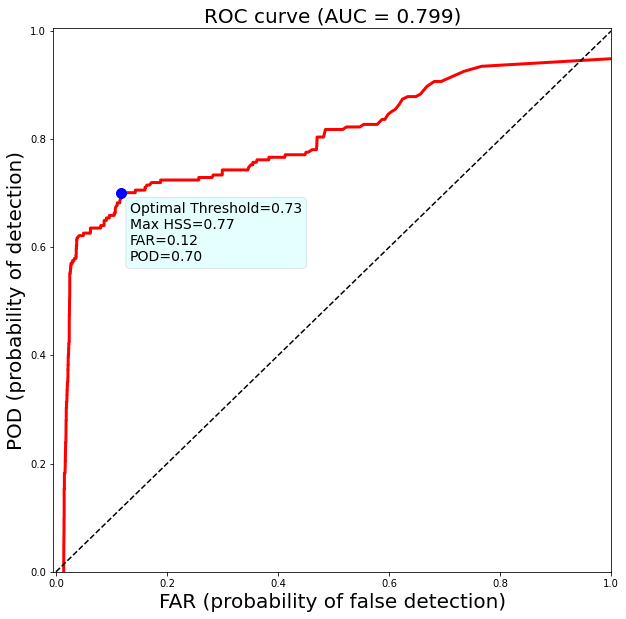

In [67]:
_ = cnn_evaluate.ROC_Curve_Plot(optimal_threshold_6_3200, TrAcc63200, Res63200)

### Category less than 6400m

In [68]:
trained_model_dir_66400 = os.path.join(trained_model_root_dir, "6hr/6400/")
tr_6_6400_ypred = pd.read_csv(trained_model_dir_66400 + 'VIS_Prob_TRAIN.csv')
tr_6_6400_ypred = tr_6_6400_ypred.to_numpy() 

tr_6_6400_ytrue = pd.read_csv(trained_model_root_dir + 'VIS_True_TRAIN.csv')
tr_6_6400_ytrue = tr_6_6400_ytrue['CAT6400']
tr_6_6400_ytrue = tr_6_6400_ytrue.to_numpy().ravel()

te_6_6400_ypred = pd.read_csv(trained_model_dir_66400 + 'VIS_Prob_TEST.csv')
te_6_6400_ypred = te_6_6400_ypred.to_numpy()

te_6_6400_ytrue = pd.read_csv(trained_model_root_dir + 'VIS_True_TEST.csv')
te_6_6400_ytrue = te_6_6400_ytrue['CAT6400']
te_6_6400_ytrue = te_6_6400_ytrue.to_numpy().ravel()

In [69]:
# calculating the optimal threshold based on training data plus all the metrics: 
optimal_threshold_6_6400, TrAcc66400, Res66400  = cnn_evaluate.skilled_metrics(tr_6_6400_ytrue, tr_6_6400_ypred, metric = 'HSS') 
# calculating the metrics for test dataset based on optimal threshold 
TeAcc66400 = cnn_evaluate.test_eval(te_6_6400_ytrue, te_6_6400_ypred, threshold = optimal_threshold_6_6400)
_ = cnn_evaluate.print_results(TrAcc66400, TeAcc66400)

Hit/Miss cases: 
       Hit    Miss    False Alarm   Correct rejected
Train  356      190         137              4777
Test   169      65        110              1884

Metrics:
       POD     F    FAR    CSI    PSS     HSS   ORSS   CSS   SEDI
Train  0.65   0.65  0.28   0.52   0.62   0.65   0.97   0.68  0.82
Test   0.72   0.06  0.39   0.49   0.67   0.61   0.96   0.57  0.83


<Figure size 720x720 with 0 Axes>

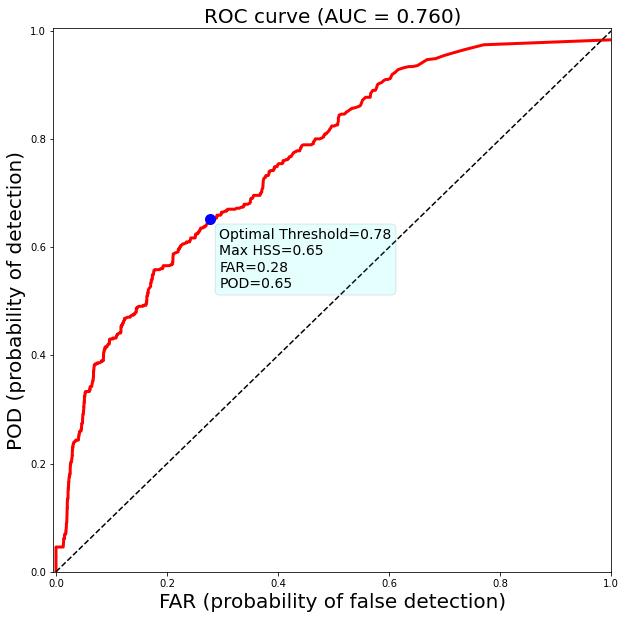

In [70]:
_ = cnn_evaluate.ROC_Curve_Plot(optimal_threshold_6_6400, TrAcc66400, Res66400)

# Monthly Evaluaitng 

In [ ]:
matplotlib.rc_file_defaults()
#ax1 = sns.set_style(style=None, rc=None )

fig, axs = plt.subplots(2, 2, figsize=(16,12))

#plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
#            hspace = 0.1, wspace = 0.1)
#plt.margins(0,0)

legend_elements = [Line2D([0], [0], marker='o', color='g', label='Hit',
                         markerfacecolor='g'),
                   Line2D([0], [0], marker='s', color='r', label='Miss',
                          markerfacecolor='r'),
                   Line2D([0], [0], marker='D', color='b', label='False Alarm',
                          markerfacecolor='b')
]

NA = patches.Patch(color='dimgray', label='All Cases')
EU = patches.Patch(color='Khaki', label='Fog Cases')


##########Plot 1 6hr 
g = sns.barplot(data = AllData,  x='Month', y='Fog Cases', color='Khaki', edgecolor='white', ax=axs[0, 0])
g.set(ylim=(0, 25))
g.set(xlabel = None)

H6 = sns.scatterplot(data = AllData, x='Month', y='Hit6',  marker='o', s = 50, 
                     color='green', alpha=1, ax=axs[0, 0], zorder=10)
H6.set(xlabel = None)
M6 = sns.scatterplot(data = AllData, x='Month', y='Miss6', marker='s', s = 50, 
                     color='red',   alpha=1, ax=axs[0, 0], zorder=10)
M6.set(xlabel = None)
F6 = sns.scatterplot(data = AllData, x='Month', y='FA6',   marker='D', s = 50, 
                     color='blue',  alpha=1, ax=axs[0, 0], zorder=10)
F6.set(xlabel = None)


##########Plot 2 12hr 
g = sns.barplot(data = AllData,  x='Month', y='Fog Cases', color='Khaki', edgecolor='white', ax=axs[0, 1])
g.set(ylim=(0, 25))
H12 = sns.scatterplot(data = AllData, x='Month', y='Hit12',  marker='o', s = 50,  
                      color='green', alpha=1, ax=axs[0, 1], zorder=10)
M12 = sns.scatterplot(data = AllData, x='Month', y='Miss12', marker='s', s = 50, 
                      color='red',   alpha=1, ax=axs[0, 1], zorder=10)
F12 = sns.scatterplot(data = AllData, x='Month', y='FA12',   marker='D',  s = 50,
                      color='blue',  alpha=1, ax=axs[0, 1], zorder=10)

##########Plot 3 24hr 
g = sns.barplot(data = AllData,  x='Month', y='Fog Cases', color='Khaki', edgecolor='white', ax=axs[1, 0])
g.set(ylim=(0, 25))

H24 = sns.scatterplot(data = AllData, x='Month', y='Hit24',  marker='o', s = 50, 
                      color='green', alpha=1, ax=axs[1, 0], zorder=20)
M24 = sns.scatterplot(data = AllData, x='Month', y='Miss24', marker='s', s = 50, 
                      color='red',   alpha=1, ax=axs[1, 0], zorder=20)
F24 = sns.scatterplot(data = AllData, x='Month', y='FA24',   marker='D', s= 50,  
                      color='blue',  alpha=1, ax=axs[1, 0], zorder=20)

##########Plot 4 cases 
g1 = sns.barplot(data = NewData2,  x='Month', y='All Cases', color='dimgray', edgecolor='white', ax=axs[1, 1])
#g.set(ylim=(0, 25))
g2 = sns.barplot(data = NewData2,  x='Month', y='Fog Cases', color='Khaki', edgecolor='white', ax=axs[1, 1])

g1.set(ylim=(0, 270))
# Iterrating over the bars one-by-one 
for bar in g1.patches: 
    
  # Using Matplotlib's annotate function and 
  # passing the coordinates where the annotation shall be done 
  # x-coordinate: bar.get_x() + bar.get_width() / 2 
  # y-coordinate: bar.get_height() 
  # free space to be left to make graph pleasing: (0, 8) 
  # ha and va stand for the horizontal and vertical alignment 
    g1.annotate(format(bar.get_height(), '.0f'),  
                   (bar.get_x() + bar.get_width() / 2,  
                    bar.get_height()), ha='center', va='center', 
                   size=10, xytext=(0, 6), 
                   textcoords='offset points') 


axs[0, 0].set_xlabel('Month', fontname = 'Times New Roman', fontsize=16)
axs[0, 0].set_ylabel('Number of Fog Cases', fontname = 'Times New Roman', fontsize=16)

axs[0, 1].set_xlabel('Month', fontname = 'Times New Roman', fontsize=16)
axs[0, 1].set_ylabel('Number of Fog Cases', fontname = 'Times New Roman', fontsize=16)

axs[1, 0].set_xlabel('Month', fontname = 'Times New Roman', fontsize=16)
axs[1, 0].set_ylabel('Number of Fog Cases', fontname = 'Times New Roman', fontsize=16)

axs[1, 1].set_xlabel('Month', fontname = 'Times New Roman', fontsize=16)
axs[1, 1].set_ylabel('Number of All Cases vs Fog Cases', fontname = 'Times New Roman', fontsize=16)


plt.setp(axs[0, 0].xaxis.get_majorticklabels(), fontname = 'Times New Roman', fontsize=16)
axs[0, 0].set_xlabel('')
plt.setp(axs[0, 0].yaxis.get_majorticklabels(), fontname = 'Times New Roman')

axs[0, 1].set_xlabel('')
plt.setp(axs[0, 1].xaxis.get_majorticklabels(), fontname = 'Times New Roman', fontsize=16)
plt.setp(axs[0, 1].yaxis.get_majorticklabels(), fontname = 'Times New Roman')

plt.setp(axs[1, 0].xaxis.get_majorticklabels(), fontname = 'Times New Roman', fontsize=16)
plt.setp(axs[1, 0].yaxis.get_majorticklabels(), fontname = 'Times New Roman')

plt.setp(axs[1, 1].xaxis.get_majorticklabels(), fontname = 'Times New Roman', fontsize=16)
plt.setp(axs[1, 1].yaxis.get_majorticklabels(), fontname = 'Times New Roman')

axs[0, 0].legend(handles=legend_elements, loc = 'upper left')
axs[0, 1].legend(handles=legend_elements, loc = 'upper left')
axs[1, 0].legend(handles=legend_elements, loc = 'upper left')

axs[1, 1].legend(handles=[NA,EU], loc='upper right')


axs[0, 0].set_title('FogNet Monthly Performance, 6Hr Prediction', fontname = 'Times New Roman', fontsize=18)
axs[0, 1].set_title('FogNet Monthly Performance, 12Hr Prediction', fontname = 'Times New Roman', fontsize=18)
axs[1, 0].set_title('FogNet Monthly Performance, 24Hr Prediction', fontname = 'Times New Roman', fontsize=18)
axs[1, 1].set_title('Number of Cases vs Fog Cases for Independent Data', fontname = 'Times New Roman', fontsize=18)

filename = 'output2.png'
plt.savefig(filename, dpi = 300) 